<a href="https://colab.research.google.com/github/k2mjh/Class2024/blob/main/nlp_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [15]:
import nltk

In [ ]:
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
text.split()

In [ ]:
' '.join(text.split())

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)

In [ ]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

### Normalization  
Stemming: am → am, the going → the go, having → hav  
Lemmatization: am → be, the going → the going, having → have

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

### Collocation, Concordance

디지털 인문학 분석

In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

In [ ]:
nltk.Text(words).collocations()

In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [ ]:
nltk.Text(words).similar("Emma")

In [ ]:
nltk.Text(words).common_contexts(["Emma", "she"])

### Frequency distribution, Frequency plot

In [ ]:
fd = nltk.FreqDist(words).most_common(20)
fd

In [ ]:
nltk.Text(words).plot(20)

### Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


In [ ]:
len(nltk.corpus.words.words('en'))

### Regular expression

Reg ex. **얘가 제일 중요 !**

In [2]:
import re

In [3]:
out = re.search('.', 'Words, words, words.')
print(out)
print(out[0])

<re.Match object; span=(0, 1), match='W'>
W


In [ ]:
out = re.search('w', 'Words, words, words.')
print(out)
print(out[0])

<re.Match object; span=(7, 8), match='w'>
w


In [4]:
out = re.search('\d', 'Words, words, words.')
print(out)

None


In [5]:
out = re.findall('w', 'Words, words, words.') #search는 가장 처음 것을 반환, findall은 해당하는 모든 것을 찾아줌
print(out) #대신에 결과값의 위치는 알려주지 않음

['w', 'w']


In [9]:
out = re.findall('v', 'Words, words, words.')
print(out) #findall은 만약 검색 패턴을 찾을 수 없으면 빈 리스트 산출

[]


In [12]:
out = re.findall('ko+', 'Wkords, wkoords, wooords') #k가 있고 여러개의 o가 연달아 나오는 것을 찾아줌
print(out) #ko자체의 반복은 괄호로 묶어서 +연결

['ko', 'koo']


In [6]:
out = re.findall('[a-z]o', 'Words, words, words.') #[a-z]o 는 알파벳 소문자와 o가 연달아 나오는 것을 의미함
print(out) #만약 대소문자 상관없이 찾고 싶으면 [Ww]o

['wo', 'wo']


In [7]:
out = re.sub('w', 'V', 'Words, words, words.') #sub = substitute 를 의미함. find처럼 찾고 두번쨰 패턴으로 바꾸라는 뜻
print(out)

Words, Vords, Vords.


In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [17]:
>>> import nltk
>>> nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [18]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)] #if이하에 만족되는 것만 w에 넣으라는 뜻
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)] #[0-9]랑 \d랑 같은 표현임 #.은 와일드카드라 진짜 마침표는 앞에 \ 붙임
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

In [ ]:
''' lookaround #주변환경에 대한 패턴

x(?=y) Matches "x" only if "x" is followed by "y"
x(?!y) Matches "x" only if "x" is not followed by "y"
(?<=y)x Matches "x" only if "x" is preceded by "y"
(?<!y)x Matches "x" only if "x" is not preceded by "y"

In [19]:
#re.sub('.afd', 'x', 'ddafadsfsafdsaf')
re.sub('.(?=afd)', 'xx', 'ddafadsfsafdsaf')

'ddafadsfxxafdsaf'

In [21]:
# capturing
re.findall('\d{4}-(\d\d)-(\d\d)', '2028-07-28') #숫자4개-숫자2개-숫자2개 인데, 뒤에 2개짜리의 괄호의 의미를 파악해야힘
#괄호 부분만 정보를 가져오라는 뜻

[('07', '28')]

### Extract information (pos tag, named entity)
**너무 중요함**

In [23]:
>>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)
words #str 속 각각의 단어들을 토큰으로 쪼개어서 리스트를 구성함

['I',
 'am',
 'Jhon',
 'from',
 'America',
 'and',
 'would',
 'like',
 'to',
 'go',
 'to',
 'Starbuck']

In [ ]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

In [27]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [28]:
pos

[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [32]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)
print(NE)

(S
  I/PRP
  am/VBP
  Jhon/RB
  from/IN
  (GPE America/NNP)
  and/CC
  would/MD
  like/VB
  to/TO
  go/VB
  to/TO
  (PERSON Starbuck/NNP))


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


### Wordcloud

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


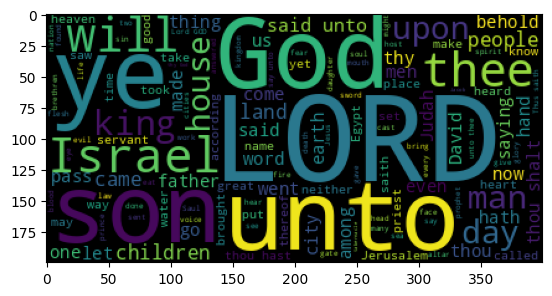

In [35]:
>>> import nltk
>>> nltk.download('gutenberg')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text)
plt.imshow(wc)

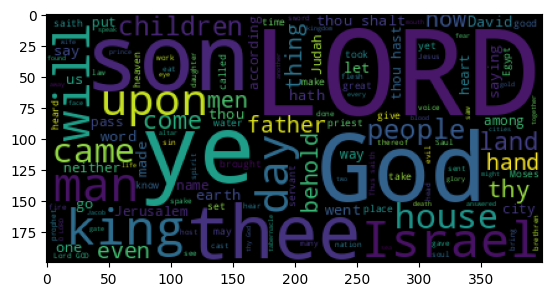

In [39]:
stopwords = set(STOPWORDS)
stopwords.add('unto') #stopword 리스트는 내가 업데이트 할 수 있음
stopwords.add('said')
wc = WordCloud(stopwords = stopwords).generate(text) #stopword와 같이 뻔한 말은 빼고 자료의 더 중요한 특징을 산출하기 위함
plt.imshow(wc)